In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import time

In [4]:
###Reflect Tables into SQLAlchemy ORM

In [5]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///C:/Users/bjros/OneDrive/Desktop/KU_Data_Analytics_Boot_Camp/Homework Assignments/Homework Week 10/sqlalchemy-challenge/SQLite File/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

In [11]:
###Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Display the Data Types
data_types = type(session.query(Measurement).first())
print(data_types.__dict__)

{'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), '__module__': 'sqlalchemy.ext.automap', '__doc__': None, '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 1e31bf026d0>, '__init__': <function __init__ at 0x000001E31BF068C8>, 'id': <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x000001E31BF02830>, 'station': <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x000001E31BF02888>, 'date': <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x000001E31BF02938>, 'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x000001E31BF029E8>, 'tobs': <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x000001E31BF02A98>, '__mapper__'

In [13]:
# Display the date of the last data point in the database
dates = session.query(Measurement.date).all()
last_date = dates[-1]
last_date

('2017-08-23')

In [14]:
# Calculate the date 1 year ago from the last data point in the database
dates = session.query(Measurement.date).all()
last_date = dates[-1]
last_date1 = pd.to_datetime(last_date)
year_ago = last_date1 - dt.timedelta(days=365)
year_ago

DatetimeIndex(['2016-08-23'], dtype='datetime64[ns]', freq=None)

In [15]:
#Convert the Dates to Timestamps
last_date1 = dt.datetime.strptime('08/23/2017', "%m/%d/%Y")
year_ago = dt.datetime.strptime('08/23/2016', "%m/%d/%Y")

In [16]:
# Perform a query to retrieve the date and precipitation scores
yearly_dates = [row for row in session.query(Measurement.date).filter(func.date(Measurement.date)>=year_ago).filter(func.date(Measurement.date)<=last_date1).all()]
print(yearly_dates)
yearly_prcp = [row for row in session.query(Measurement.prcp).filter(func.date(Measurement.date)>=year_ago).filter(func.date(Measurement.date)<=last_date1).all()]
print(yearly_prcp)

[('2016-08-24',), ('2016-08-25',), ('2016-08-26',), ('2016-08-27',), ('2016-08-28',), ('2016-08-29',), ('2016-08-30',), ('2016-08-31',), ('2016-09-01',), ('2016-09-02',), ('2016-09-03',), ('2016-09-04',), ('2016-09-05',), ('2016-09-06',), ('2016-09-07',), ('2016-09-08',), ('2016-09-09',), ('2016-09-10',), ('2016-09-11',), ('2016-09-12',), ('2016-09-13',), ('2016-09-14',), ('2016-09-15',), ('2016-09-16',), ('2016-09-17',), ('2016-09-18',), ('2016-09-19',), ('2016-09-20',), ('2016-09-21',), ('2016-09-22',), ('2016-09-23',), ('2016-09-24',), ('2016-09-25',), ('2016-09-26',), ('2016-09-27',), ('2016-09-28',), ('2016-09-29',), ('2016-09-30',), ('2016-10-01',), ('2016-10-02',), ('2016-10-03',), ('2016-10-04',), ('2016-10-05',), ('2016-10-06',), ('2016-10-07',), ('2016-10-08',), ('2016-10-09',), ('2016-10-10',), ('2016-10-11',), ('2016-10-12',), ('2016-10-13',), ('2016-10-14',), ('2016-10-15',), ('2016-10-16',), ('2016-10-17',), ('2016-10-18',), ('2016-10-19',), ('2016-10-20',), ('2016-10-21'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#Found method to save query results as Pandas DataFrame from https://stackoverflow.com/questions/35937579/pandas-read-sql-columns-not-working-when-using-index-col-returns-all-columns-i
precipitation_df = pd.DataFrame({'Precipitation':yearly_prcp}, index=yearly_dates)

#Rename the Index Column
#Method Found at https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index
precipitation_df = precipitation_df.rename_axis("Date")
#Sort the Data and Make the Date Column Accessible
precipitation_df = precipitation_df.sort_index().reset_index()
#Pull Values Out of Tuples in Columns
#Method Found at https://stackoverflow.com/questions/29550414/how-to-split-column-of-tuples-in-pandas-dataframe
precipitation_df['Date'] = pd.DataFrame(precipitation_df['Date'].tolist())
precipitation_df['Precipitation'] = pd.DataFrame(precipitation_df['Precipitation'].tolist())
#Show the Precipitation Data
precipitation_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,NaN
2,2016-08-24,2.15
3,2016-08-24,2.28
4,2016-08-24,2.15
...,...,...
2218,2017-08-22,0.00
2219,2017-08-23,0.08
2220,2017-08-23,0.00
2221,2017-08-23,0.00


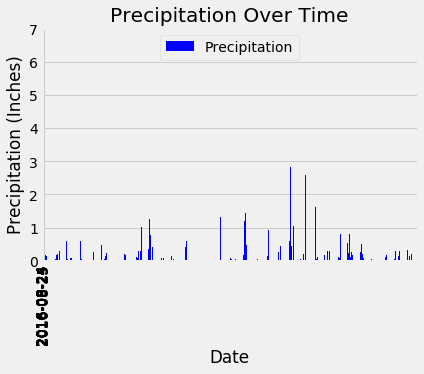

<Figure size 432x288 with 0 Axes>

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
#Pandas Plot
precipitation_df.plot(x="Date", y="Precipitation", kind="bar", color="blue", grid = True)
plt.title("Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.xticks(np.arange(0, 12, step=1), precipitation_df['Date'], rotation=90)
plt.show()

#Save the Figure
plt.savefig("../Pictures/Precipitation.png")

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df['Precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [20]:
 # Design a query to show how many stations are available in this dataset?
num_stations = session.query(Measurement.station).group_by(Measurement.station).count()
num_stations

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = [row for row in session.query(Measurement.station).group_by(Measurement.station).all()]
print(stations)
station_counts = [row for row in session.query(func.count(Measurement.station)).group_by(Measurement.station).all()]
print(station_counts)
print("-"*120)
print("USC00519281 is the most active station.")

#Put the Data in a DataFrame
stations_df = pd.DataFrame({'Station':stations, 'Station Activity':station_counts})
#Take the Values Out of Tuples
#Method to Take Values Out of Tuples Found at https://stackoverflow.com/questions/16296643/convert-tuple-to-list-and-back
stations_df['Station'] = pd.DataFrame(stations_df['Station'].tolist())
stations_df['Station Activity'] = pd.DataFrame(map(list, stations_df['Station Activity']))
#Sort the Values by Station Activity Counts
stations_df = stations_df.sort_values('Station Activity', ascending=False)
#Show the Station Data
stations_df

[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]
[(1979,), (2709,), (2202,), (2612,), (1372,), (511,), (2772,), (2724,), (2669,)]
------------------------------------------------------------------------------------------------------------------------
USC00519281 is the most active station.


,Station,Station Activity
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low_temp = session.query(func.min(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.station=='USC00519281').all()
print(f"The lowest recorded temperature at the most active station was {low_temp}oF.")
high_temp = session.query(func.max(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.station=='USC00519281').all()
print(f"The lowest recorded temperature at the most active station was {high_temp}oF.")
avg_temp = session.query(func.round(func.avg(Measurement.tobs))).group_by(Measurement.station).filter(Measurement.station=='USC00519281').all()
print(f"The lowest recorded temperature at the most active station was {avg_temp}oF.")

The lowest recorded temperature at the most active station was [(54.0,)]oF.
The lowest recorded temperature at the most active station was [(85.0,)]oF.
The lowest recorded temperature at the most active station was [(72.0,)]oF.


In [23]:
 # Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Determine the last date
last_date_station = [row for row in session.query(Measurement.date).filter(Measurement.station=='USC00519281').order_by(Measurement.date.desc()).first()]
#Convert to DateTime
last_date_station = pd.to_datetime(last_date_station)
print(last_date_station)

#Calculate the Date from a Year Ago
start_date_station = last_date_station - dt.timedelta(days=365)
print(start_date_station)

#Convert the Dates to Timestamps
last_date_station = dt.datetime.strptime('08/18/2017', "%m/%d/%Y")
start_date_station = dt.datetime.strptime('08/18/2016', "%m/%d/%Y")

#Perform Query
yearly_dates = [row for row in session.query(Measurement.date).filter(Measurement.station=='USC00519281').filter(func.date(Measurement.date)>=start_date_station).filter(func.date(Measurement.date)<=last_date_station).all()]
yearly_temps = [row for row in session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(func.date(Measurement.date)>=start_date_station).filter(func.date(Measurement.date)<=last_date_station).all()]

# Save the query results as a Pandas DataFrame and set the index to the date column
#Found method to save query results as Pandas DataFrame from https://stackoverflow.com/questions/35937579/pandas-read-sql-columns-not-working-when-using-index-col-returns-all-columns-i
temp_df = pd.DataFrame({'Temperature':yearly_temps}, index=yearly_dates)

#Rename the Index Column
#Method Found at https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index
temp_df = temp_df.rename_axis("Date")
#Sort the Data and Make the Date Column Accessible
temp_df = temp_df.sort_index().reset_index()
#Pull Values Out of Tuples in Columns
#Method Found at https://stackoverflow.com/questions/29550414/how-to-split-column-of-tuples-in-pandas-dataframe
temp_df['Date'] = pd.DataFrame(temp_df['Date'].tolist())
temp_df['Temperature'] = pd.DataFrame(temp_df['Temperature'].tolist())
#Show the Precipitation Data
temp_df

DatetimeIndex(['2017-08-18'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2016-08-18'], dtype='datetime64[ns]', freq=None)


,Date,Temperature
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0
...,...,...
351,2017-08-14,77.0
352,2017-08-15,77.0
353,2017-08-16,76.0
354,2017-08-17,76.0


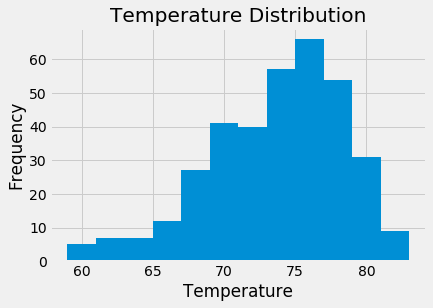

<Figure size 432x288 with 0 Axes>

In [24]:
#Create the Bins & Groups
bins = [53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86]
groups = ['53-56', '56-59', '59-62', '62-65', '65-68', '68-71', '71-74', '74-77', '77-80', '80-83', '83-86']

#Assign the Temperature Values to Groups
temp_df['Temperature Groups'] = pd.cut(temp_df['Temperature'], bins, labels=groups)

#Create the Plot
temp_df.hist(bins=12)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

#Show the Plot
plt.show()

#Save the Figure
plt.savefig("../Pictures/Temperature_Distribution.png")

In [25]:
###Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [28]:
 # Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [30]:
 # Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [33]:
# Plot the daily normals as an area plot with `stacked=False`